## Chapter 1 - Introducing Image Processing and scikit-image

Jump into digital image structures and learn to process them! 

Extract data, transform and analyze images using NumPy and Scikit-image. 

Convert RGB images to grayscale, get data from them, obtain histograms containing very useful information, and separate objects from the background!

### 📒 Image Processing:

A method to perform operations on images and videos to enhance an image, extract useful information from them, analyze it and make decisions.

Image processing is a subset of computer vision.

#### Applications of Image Processing:

- Medical Image Analysis
- Artificial Intelligence
- Image Restoration and Enhancement
- Geospatial Computing
- Robotic Vision
- Surveillance

...etc

#### Purposes:

1. <u>Visualization:</u> To observe objects that are not visible
2. <u>Image Sharpening and Restoration:</u> To create a better image
3. <u>Image Retrieval:</u> To seek for the image of interest
4. <u>Measurement of Pattern:</u> To measure various objects
5. <u>Image Recognition:</u> To distinguish objects in an image

### 📒 Digital Image:

A digital image is a 2-D array or matrix of square pixels arranged in columns and rows.

*The pixels contain information about color and intensity*

So, an image can be treated as a **matrix of intensity**.

<br>

2-dimensional color images are often represented in a 3 layers of 2-D arrays or **RGB** (red, green and blue -> three channels of image)

**Grayscale Images** only have shades of black and white. Often the grayscale intensity is stored in an 8 bit integer (0-255) giving 256 possible different shades of gray.

*Grayscale images don't have any color information.*

*RGB images have 3 channels while grayscale images have a single channel*

### 1.1 Make images come alive with scikit-image

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from skimage import io

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')

#### 📝 RGB to grayscale

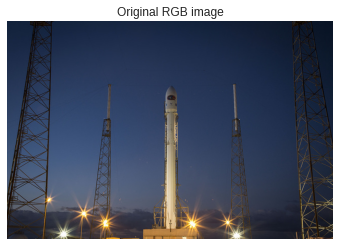

In [3]:
# Import the modules from skimage
from skimage import data, color

# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

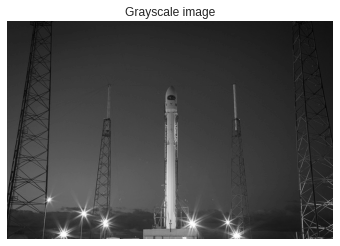

In [4]:
# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

---

### 1.2 NumPy for images


In [5]:
type(rocket)

numpy.ndarray

Color image is a numpy array with a third dimension for color channels. We can slice the multidimensional array and obtain these channels separately.

In [6]:
# Obtaining the red values of the image
rocket[:, :, 0]

array([[ 17,  17,  17, ...,   8,   8,   7],
       [ 17,  17,  17, ...,   8,   8,   8],
       [ 18,  18,  18, ...,   8,   8,   8],
       ...,
       [ 27,  29,  20, ..., 136, 186, 173],
       [ 26,  29,  30, ..., 103,  97,  76],
       [ 26,  29,  40, ...,  82,  79,  83]], dtype=uint8)

In [7]:
# Obtaining the green values of the image
rocket[:, :, 1]

array([[ 33,  33,  33, ...,  19,  19,  18],
       [ 33,  33,  33, ...,  19,  19,  19],
       [ 34,  34,  34, ...,  19,  19,  19],
       ...,
       [ 28,  29,  24, ..., 106, 136, 119],
       [ 27,  32,  34, ...,  67,  61,  49],
       [ 27,  32,  46, ...,  53,  50,  61]], dtype=uint8)

In [8]:
# Obtaining the blue values of the image
rocket[:, :, 2]

array([[58, 58, 59, ..., 37, 37, 36],
       [58, 58, 59, ..., 37, 37, 37],
       [59, 59, 60, ..., 37, 37, 37],
       ...,
       [32, 37, 36, ..., 82, 85, 81],
       [31, 39, 46, ..., 45, 27, 20],
       [31, 39, 60, ..., 37, 32, 37]], dtype=uint8)

In [9]:
# Accessing the shape of the image
rocket.shape

(427, 640, 3)

In [10]:
# Total number of pixels
rocket.size

819840

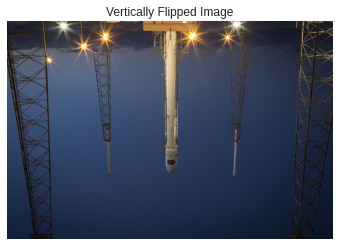

In [11]:
# Flip image in up direction
vertically_flipped = np.flipud(rocket)

show_image(vertically_flipped, "Vertically Flipped Image")

📒 **Histogram of an image** is the graphical representation of the amount of pixels of each intensity value from 0 (pure black) to 255 (pure white)

**Applications of Histogram:**
- Thresholding
- Brightness and contrast
- Equalize an image

In [12]:
dark_image = io.imread("https://raw.githubusercontent.com/Naimul-Islam-Siam/Image-Processing/master/img/dark1.jpeg?token=AKCTEMJDGIYA2ZYZR323EE3ATHK5Y")

white_image = io.imread("https://raw.githubusercontent.com/Naimul-Islam-Siam/Image-Processing/master/img/white1.jpg?token=AKCTEMP4MXX45PKP2D3MRYTATHLBM")

In [13]:
plt.rcParams["figure.figsize"] = (15,6)

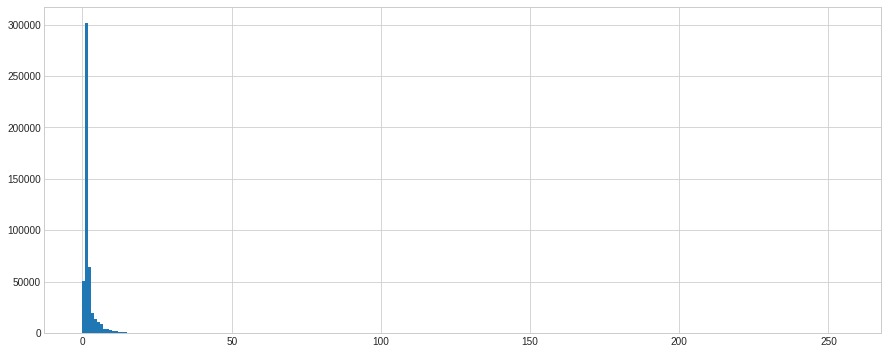

In [14]:
plt.hist(dark_image.ravel(), bins=256);

As this was a black image, the intensity levels were mostly in 0 to 20 range.

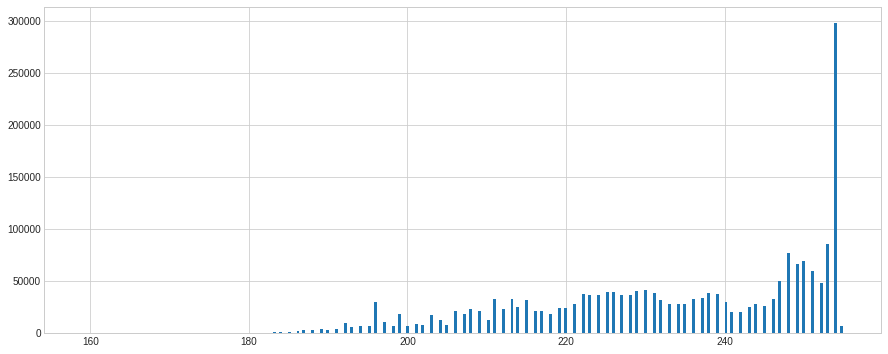

In [15]:
plt.hist(white_image.ravel(), bins=256);

As this was a white image, the intensity levels were of 200 to 255 range mostly.

#### 📝 Flipping out

In [16]:
flipped_seville = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/915096a8c431745a13227259e81103d90e038ec0/sevilleup(2).jpg")

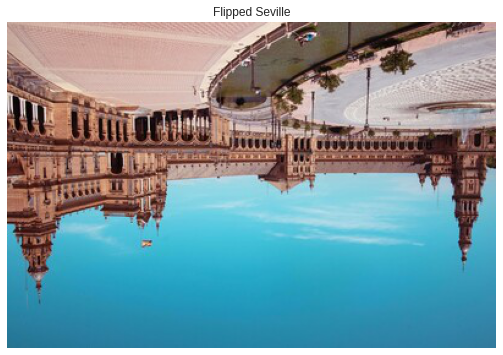

In [17]:
show_image(flipped_seville, "Flipped Seville");

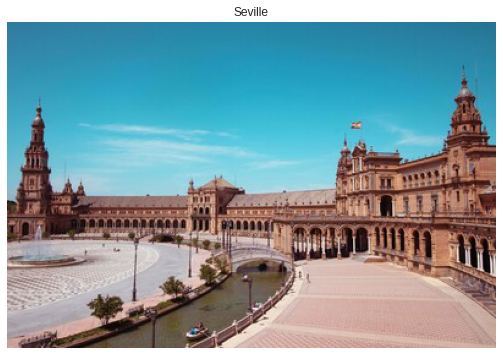

In [18]:
# Flip the image vertically
seville_vertical_flip = np.flipud(flipped_seville)

# Flip the image horizontally
seville_horizontal_flip = np.fliplr(seville_vertical_flip)

# Show the resulting image
show_image(seville_horizontal_flip, 'Seville');

#### 📝 Histograms

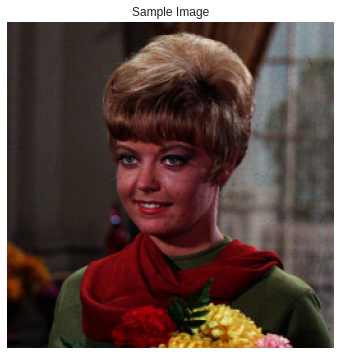

In [19]:
image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/4ce875b1fceea382361da4fb4177ec2f16a8c016/4.1.01.jpg")

show_image(image, "Sample Image");

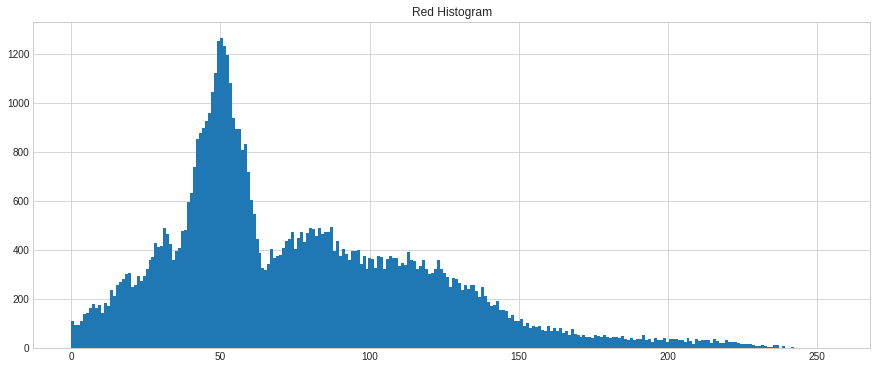

In [20]:
# Obtain the red channel
red_channel = image[:, :, 0]

# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Red Histogram')
plt.show()

---

### 1.3 Getting started with thresholding

**Thresholding** is the process of partioning an image into foreground and background.

<br>

*It works best for high contrast grayscale images.* So, to threshold a color image we must first convert that to a grayscale image.

<br>

Thresholding of a grayscale image is done by making it black and white. It is done so by turning the pixels to white (255) if that pixel intensity is over a threshold value and turning the pixels black (0) if that pixel intensity is less than the threshold value.

<br>

**Inverted thresholding** is done just inverting when to use black and when to use white.

<br>

It is the simplest method of **image segmentation**.

<br>

**Applications of thresholding:**
- Isolating objects
- Object detection
- Facial recognition
...etc

<br>

**Categories of thresholding:**
- <u>Global or Histogram based:</u> Good for images having relatively uniform backgrounds and *high contrast*
- <u>Local or Adaptive based:</u> Good for images having uneven background (background is not easily differentiated) and *lower contrast*

<br>

*Local thresholding is slower than global thresholding*

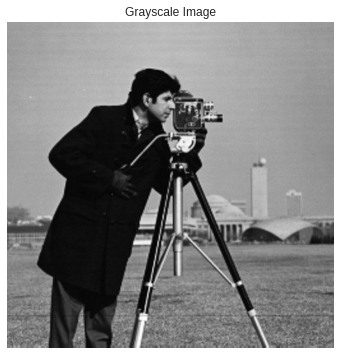

In [21]:
grayscale_image1 = io.imread("https://raw.githubusercontent.com/Naimul-Islam-Siam/Image-Processing/master/img/grayscale_image1.jpg?token=AKCTEMOKYR3DEQUWV66H4SDATLC5G")

show_image(grayscale_image1, "Grayscale Image");

Try different thresholding algorithms

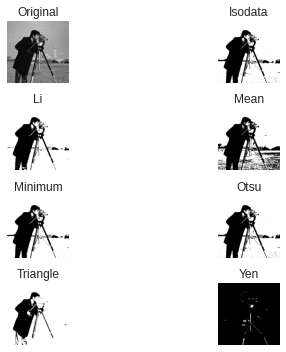

In [22]:
from skimage.filters import try_all_threshold

# Obtain all the resulting images
fig, ax = try_all_threshold(grayscale_image1, verbose=False)

**Optimal thresh value**

**Global**

Good for images having relatively uniform backgrounds and *high contrast*

In [23]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtain the optimal thresh value
thresh = threshold_otsu(grayscale_image1)

# Apply thresholding to the image
binary_global = grayscale_image1 > thresh

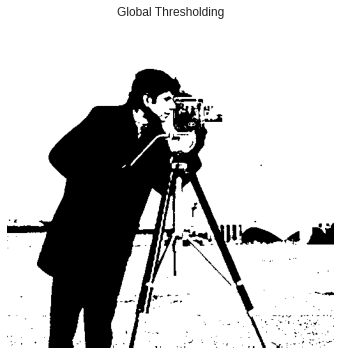

In [24]:
# Show binarized image
show_image(binary_global, "Global Thresholding");

**Optimal thresh value**

**Local**

Good for images having uneven background (background is not easily differentiated) and *lower contrast*

With threshold local, we calculate thresholds in small pixel regions surrounding each pixel we are binarizing. So we need to specify a block size to surround each pixel also known as **local neighborhoods**. And an offset which is a constant subtracted from the mean of blocks to calculate the local threshold value.

In [25]:
# Import local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(grayscale_image1, block_size, offset=10)

# Apply local threshold and obtain the binary image
binary_local = grayscale_image1 > local_thresh

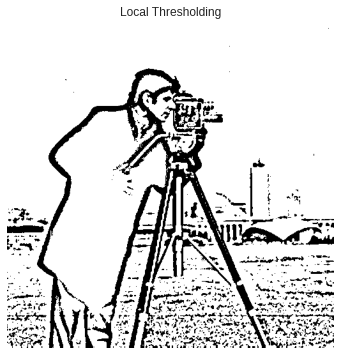

In [26]:
# Show binarize image
show_image(binary_local, "Local Thresholding");

### 📒 Apply global thresholding

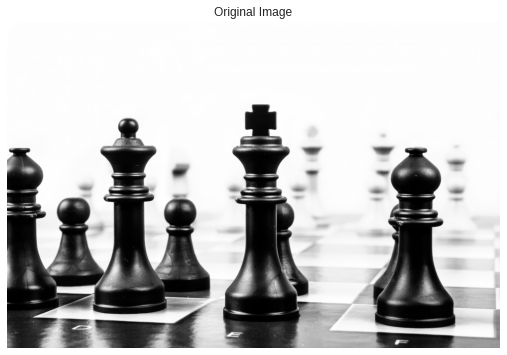

In [27]:
# Obtain the original image
chess_pieces_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/a3e2534b613b0083fd4b39aedbcf6dea8fd13947/bw.jpg")

show_image(chess_pieces_image, "Original Image");

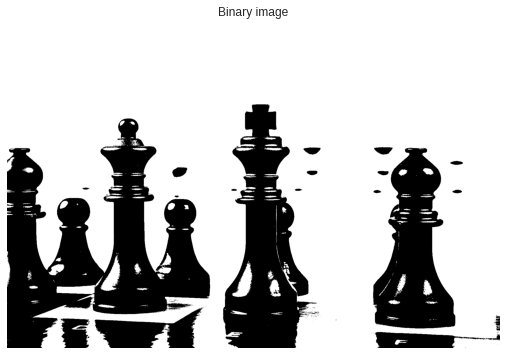

In [28]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Make the image grayscale using rgb2gray
chess_pieces_image_gray = rgb2gray(chess_pieces_image)

# Obtain the optimal threshold value with otsu
thresh = threshold_otsu(chess_pieces_image_gray)

# Apply thresholding to the image
binary = chess_pieces_image_gray > thresh

# Show the image
show_image(binary, 'Binary image')

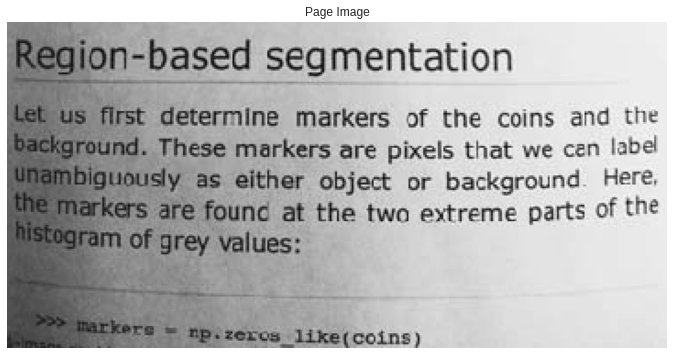

In [29]:
page_image = io.imread("https://raw.githubusercontent.com/goodboychan/goodboychan.github.io/main/_notebooks/dataset/text_page.png")

show_image(page_image, "Page Image")

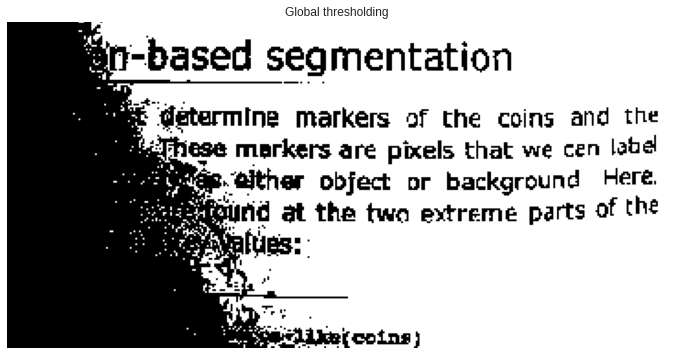

In [30]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

page_image = rgb2gray(page_image)

# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(page_image)

# Obtain the binary image by applying global thresholding
binary_global = page_image > global_thresh

# Show the binary image obtained
show_image(binary_global, 'Global thresholding')

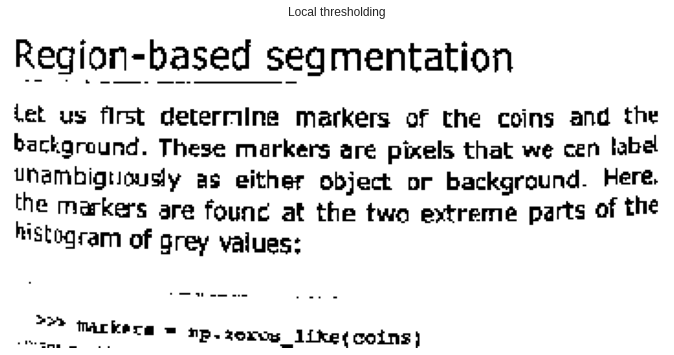

In [31]:
# Import the local threshold function
from skimage.filters import threshold_local

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(page_image, block_size, offset=0.1)

# Obtain the binary image by applying local thresholding
binary_local = page_image > local_thresh

# Show the binary image
show_image(binary_local, 'Local thresholding')

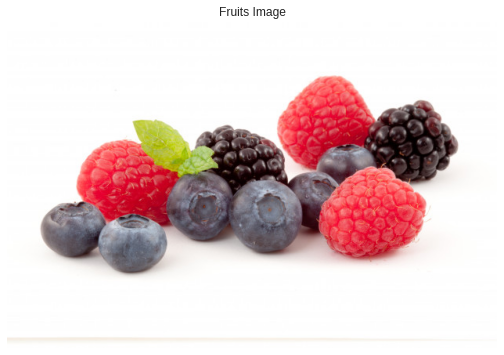

In [32]:
fruits_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/1683f923022eadec156f155e80782274b95078ad/fruits-2.jpg")

show_image(fruits_image, "Fruits Image")

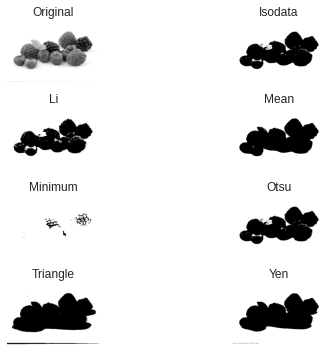

In [33]:
# Import the try all function
from skimage.filters import try_all_threshold

# Import the rgb to gray convertor function 
from skimage.color import rgb2gray

# Turn the fruits_image to grayscale
grayscale = rgb2gray(fruits_image)

# Use the try all method on the resulting grayscale image
fig, ax = try_all_threshold(grayscale, verbose=False)

# Show the resulting plots
plt.show()

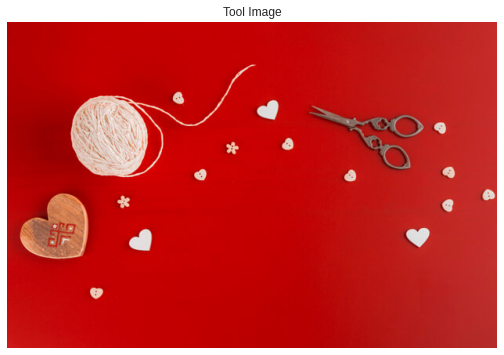

In [34]:
tools_image = io.imread("https://assets.datacamp.com/production/repositories/4470/datasets/06b99c764a8d81145e33a9ac3ace8dade55fced2/shapes52.jpg")

show_image(tools_image, "Tool Image")

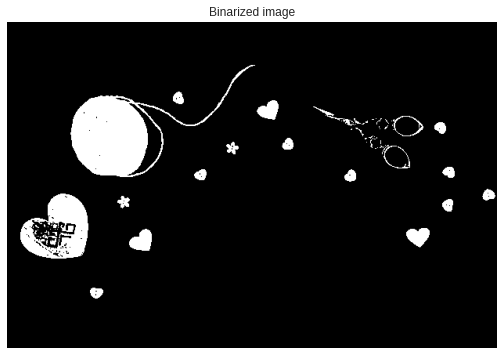

In [35]:
# Import threshold and gray convertor functions
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray

# Turn the image grayscale
gray_tools_image = rgb2gray(tools_image)

# Obtain the optimal thresh
thresh = threshold_otsu(gray_tools_image)

# Obtain the binary image by applying thresholding
binary_image = gray_tools_image > thresh

# Show the resulting binary image
show_image(binary_image, 'Binarized image')

---